* [dafiti/causalimpact](https://github.com/dafiti/causalimpact)
* [Python版CausalImpactを用いたTVCMの効果検証](https://www.lifull.blog/entry/2020/04/20/114200)

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    125.23             3756.86
Prediction (s.d.)         120.39 (0.27)      3611.81 (8.04)
95% CI                    [119.88, 120.93]   [3596.28, 3627.8]

Absolute effect (s.d.)    4.84 (0.27)        145.06 (8.04)
95% CI                    [4.3, 5.35]        [129.06, 160.58]

Relative effect (s.d.)    4.02% (0.22%)      4.02% (0.22%)
95% CI                    [3.57%, 4.45%]     [3.57%, 4.45%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 125.23. By contrast, in the absence of an
intervention, we would have expected an average response of 120.39.
The 95% interval of this counterfactual prediction is [119.88, 120.93].
Subtracting this prediction from t

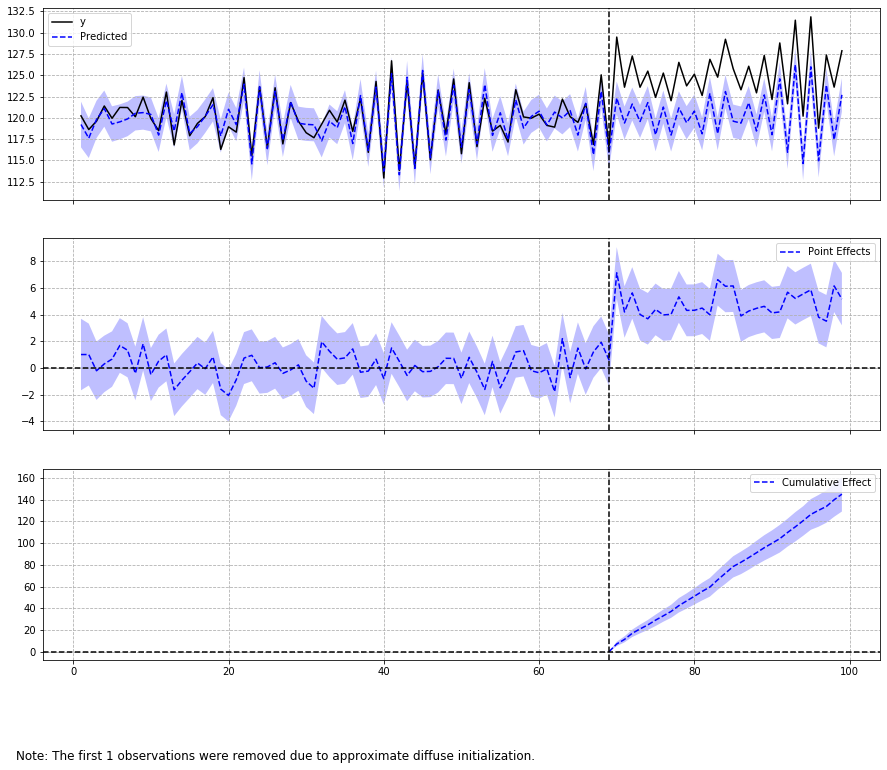

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Unobserved Components Results                         
==============================================================================
Dep. Variable:                      y   No. Observations:                   70
Model:                    local level   Log Likelihood                 -22.952
Date:                Mon, 10 Aug 2020   AIC                             51.905
Time:                        07:21:51   BIC                             58.607
Sample:                             0   HQIC                            54.564
                                 - 70                                         
Covariance Type:                  opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.1054      0.022      4.776      0.000       0.062       0.149
sigma2.level         0.0001      0.001      0.212      0.832      -0.001       0.001
beta.X               0.9472      0.047     20.274      0.000       0.856       1.039
===================================================================================
Ljung-Box (Q):                       38.77   Jarque-Bera (JB):                 0.95
Prob(Q):                              0.53   Prob(JB):                         0.62
Heteroskedasticity (H):               1.15   Skew:                            -0.18
Prob(H) (two-sided):                  0.73   Kurtosis:                         2.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import ArmaProcess
from causalimpact import CausalImpact

np.random.seed(12345)
ar = np.r_[1, 0.9]
ma = np.array([1])
arma_process = ArmaProcess(ar, ma)
X = 100 + arma_process.generate_sample(nsample=100)
y = 1.2 * X + np.random.normal(size=100)
y[70:] += 5

data = pd.DataFrame({'y': y, 'X': X}, columns=['y', 'X'])
pre_period = [0, 69]
post_period = [70, 99]

ci = CausalImpact(data, pre_period, post_period)
print(ci.summary())
print(ci.summary(output='report'))
ci.plot()

ci.trained_model.summary()

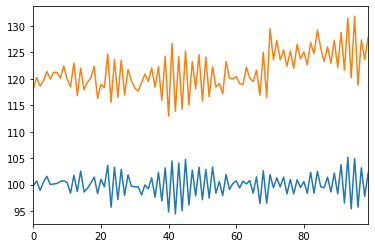

In [8]:
data.X.plot()
data.y.plot()

In [9]:
data

,y,X
0,118.188694,99.795292
1,120.233276,100.663180
2,118.627775,98.883699
3,119.609722,100.448941
4,121.391508,101.561734
...,...,...
95,131.838436,104.939544
96,118.786121,95.672520
97,127.362025,103.146201
98,123.600675,97.753389
